In [13]:
%pip -q install ds1054z matplotlib pandas

Note: you may need to restart the kernel to use updated packages.


In [18]:
from ds1054z import DS1054Z
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import json


In [14]:

scope = DS1054Z('192.168.1.23')

print(scope.idn)

RIGOL TECHNOLOGIES,DS1054Z,DS1ZA224913249,00.04.04.SP4


In [41]:
measurements_name = ["vmax", "vmin", "vpp", "vavg", "frequency", "pslewrate", "nslewrate", "vmid",]
channels = ["CHAN1", "CHAN2", "CHAN3", "CHAN4"]


In [75]:
print(np.array(scope.waveform_time_values))

[-0.0003, -0.00029949999999999996, -0.00029899999999999995, -0.0002985, -0.000298, -0.00029749999999999997, -0.00029699999999999996, -0.0002965, -0.000296, -0.00029549999999999997, -0.00029499999999999996, -0.00029449999999999995, -0.000294, -0.0002935, -0.00029299999999999997, -0.00029249999999999995, -0.000292, -0.0002915, -0.00029099999999999997, -0.00029049999999999996, -0.00029, -0.0002895, -0.000289, -0.00028849999999999997, -0.00028799999999999995, -0.0002875, -0.000287, -0.00028649999999999997, -0.00028599999999999996, -0.00028549999999999995, -0.000285, -0.0002845, -0.00028399999999999996, -0.00028349999999999995, -0.000283, -0.0002825, -0.00028199999999999997, -0.00028149999999999996, -0.000281, -0.0002805, -0.00028, -0.00027949999999999996, -0.00027899999999999995, -0.0002785, -0.000278, -0.00027749999999999997, -0.00027699999999999996, -0.0002765, -0.000276, -0.0002755, -0.00027499999999999996, -0.00027449999999999995, -0.000274, -0.0002735, -0.00027299999999999997, -0.0002

In [103]:
def acquire_waveforms():
    scope.run()
    waveforms = {}
    for channel in channels:
        print(f'Adquiring waveform of channel {channel}')
        waveforms[channel] = scope.get_waveform_samples(channel, 'NORM')
    waveforms['time'] = np.array(scope.waveform_time_values)

    return pd.DataFrame(waveforms)

def acquire_all_measurements():
    scope.run()
    channels = {"CHAN1": {}, "CHAN2": {}, "CHAN3": {}, "CHAN4": {}}
    for channel in channels_name:
        for measurement in measurements_name:
            print(f'getting measuremnt {measurement} of channel {channel}')
            # try to get measurement if not possible measure is None
            try:
                channels[channel][measurement] = scope.get_channel_measurement(channel, measurement)
            except:
                channels[channel][measurement] = None
    return channels

def get_waveforms(test_name):
    return pd.read_csv(test_name + '/waveforms.csv', index_col='time')

def get_all_measurements(test_name):
    with open(test_name + '/measurements.json') as json_file:
        return json.load(json_file)

def create_test(test_name):
    os.mkdir(test_name)
    acquire_waveforms().to_csv(test_name + '/waveforms.csv')
    # Save measurements to json file
    with open(test_name + '/measurements.json', 'w') as outfile:
        json.dump(acquire_all_measurements(), outfile)




In [116]:
test_name = "vco--2,vdc-6"
create_test(test_name)

Adquiring waveform of channel CHAN1
Adquiring waveform of channel CHAN2
Adquiring waveform of channel CHAN3
Adquiring waveform of channel CHAN4
getting measuremnt vmax of channel CHAN1
getting measuremnt vmin of channel CHAN1
getting measuremnt vpp of channel CHAN1
getting measuremnt vavg of channel CHAN1
getting measuremnt frequency of channel CHAN1
getting measuremnt pslewrate of channel CHAN1
getting measuremnt nslewrate of channel CHAN1
getting measuremnt vmid of channel CHAN1
getting measuremnt vmax of channel CHAN2
getting measuremnt vmin of channel CHAN2
getting measuremnt vpp of channel CHAN2
getting measuremnt vavg of channel CHAN2
getting measuremnt frequency of channel CHAN2
getting measuremnt pslewrate of channel CHAN2
getting measuremnt nslewrate of channel CHAN2
getting measuremnt vmid of channel CHAN2
getting measuremnt vmax of channel CHAN3
getting measuremnt vmin of channel CHAN3
getting measuremnt vpp of channel CHAN3
getting measuremnt vavg of channel CHAN3
getting m

,Unnamed: 0,CHAN1,CHAN2,CHAN3,CHAN4
time,,,,,
-0.003000,0,-9.628,3.20,-2.08,6.0544
-0.002995,1,-9.976,3.36,-1.92,5.9136
-0.002990,2,-9.628,3.28,-2.08,6.0544
-0.002985,3,-9.976,3.44,-2.00,5.9136
-0.002980,4,-9.628,3.36,-2.08,6.0544
...,...,...,...,...,...
0.002975,1195,-9.976,2.88,-1.92,5.9136
0.002980,1196,-9.628,2.80,-2.08,6.0544
0.002985,1197,-9.976,2.96,-2.00,5.9840


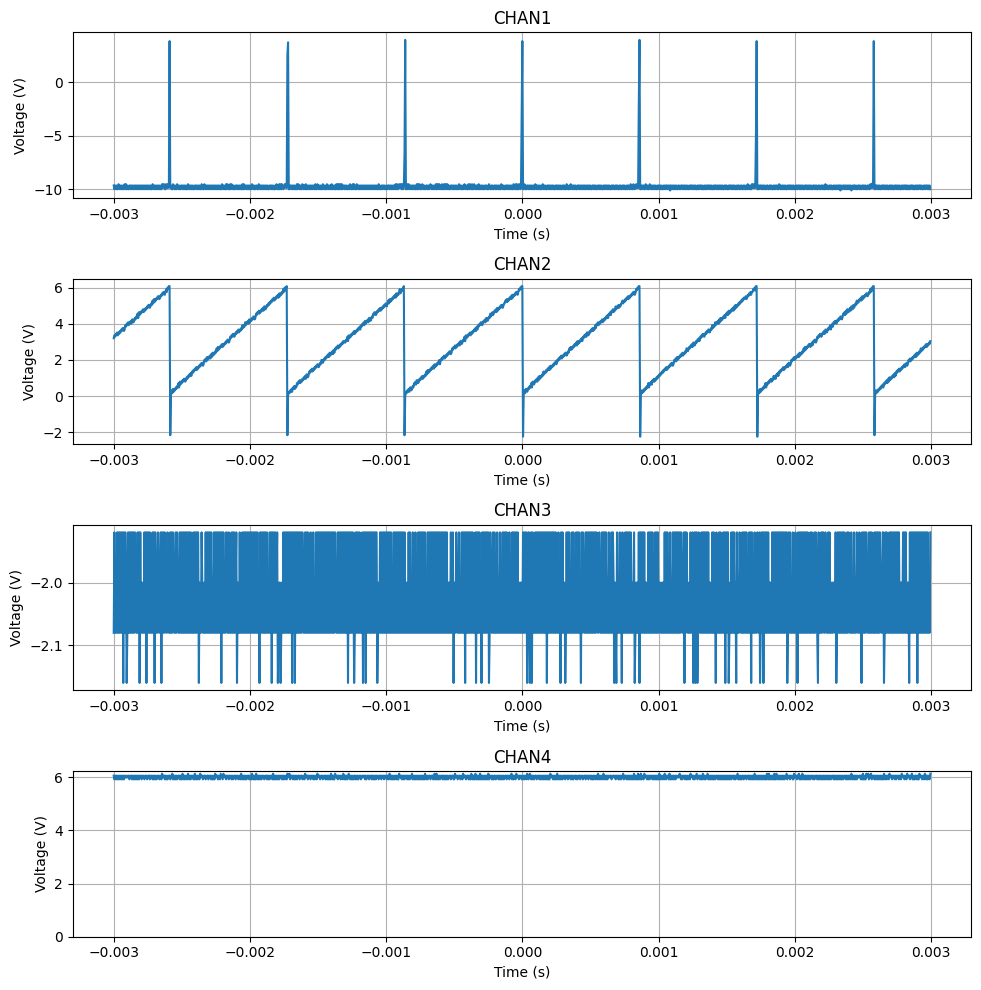

{
    "CHAN1": {
        "frequency": 1162.791,
        "nslewrate": -1088835.0,
        "pslewrate": 12582.08,
        "vavg": -9.698511,
        "vmax": 3.828,
        "vmid": -2.97055,
        "vmin": -10.092,
        "vpp": 13.8
    },
    "CHAN2": {
        "frequency": 1162.791,
        "nslewrate": -7694.797,
        "pslewrate": 8994.594,
        "vavg": 3.079933,
        "vmax": 6.08,
        "vmid": 1.92,
        "vmin": -2.24,
        "vpp": 8.32
    },
    "CHAN3": {
        "frequency": null,
        "nslewrate": null,
        "pslewrate": null,
        "vavg": -2.011772,
        "vmax": -1.92,
        "vmid": null,
        "vmin": -2.16,
        "vpp": 0.2400001
    },
    "CHAN4": {
        "frequency": null,
        "nslewrate": null,
        "pslewrate": null,
        "vavg": 5.997127,
        "vmax": 6.1248,
        "vmid": null,
        "vmin": 5.9136,
        "vpp": 0.21
    }
}


In [117]:


df = get_waveforms(test_name)
display(df)

# Plot waveforms using subplots
fig, axs = plt.subplots(4, 1, figsize=(10, 10))
for i, channel in enumerate(channels):
    axs[i].plot(df.index, df[channel])
    axs[i].set_title(channel)
    axs[i].set_xlabel('Time (s)')
    axs[i].set_ylabel('Voltage (V)')
    axs[i].grid(True)

    # Configure scale to plot between min value and max voltage
    # If min value is greater than 0 plot between 0 and max voltage
    if df[channel].min() > 0:
        axs[i].set_ylim([0, df[channel].max() + 0.1])
    

plt.tight_layout()
plt.show()

# Print all measurements
print(json.dumps(get_all_measurements(test_name), indent=4, sort_keys=True))




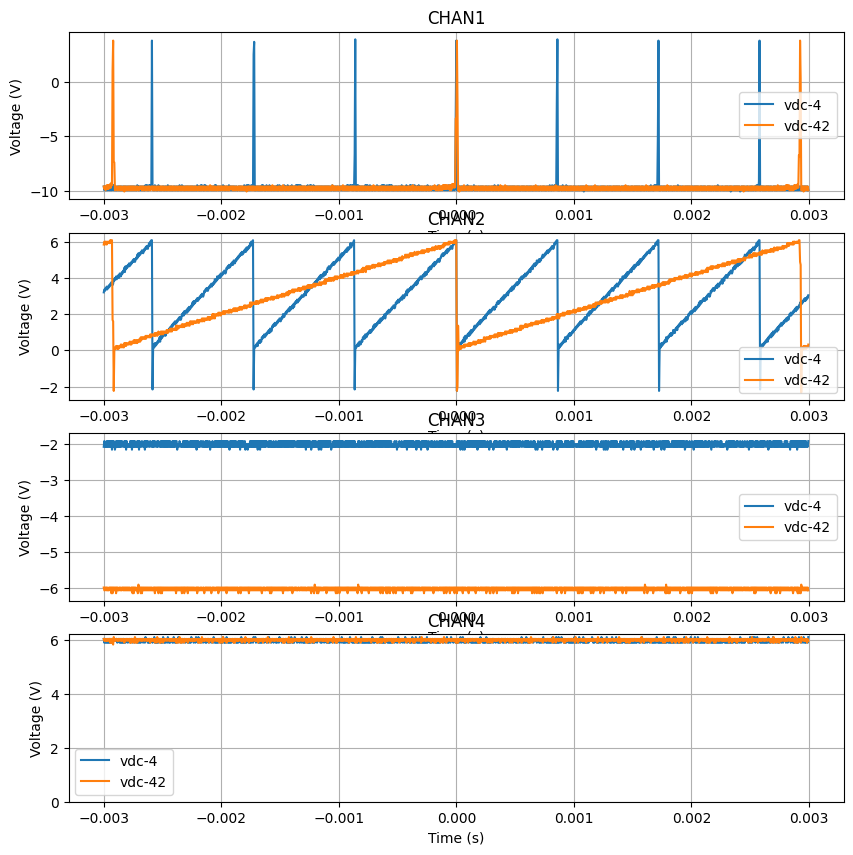

In [119]:
# Comparing waveforms of test vco-0,vdc-4 and vco-0,vdc-42
df1 = get_waveforms("vco--2,vdc-6")
df2 = get_waveforms("vco--6,vdc-6")

# Plot waveforms using subplots
fig, axs = plt.subplots(4, 1, figsize=(10, 10))
for i, channel in enumerate(channels):  
    axs[i].plot(df1.index, df1[channel], label='vdc-4')
    axs[i].plot(df1.index, df2[channel], label='vdc-42')
    axs[i].set_title(channel)
    axs[i].set_xlabel('Time (s)')
    axs[i].set_ylabel('Voltage (V)')
    axs[i].legend()
    axs[i].grid(True)

    # Configure scale to plot between min value and max voltage
    # If min value is greater than 0 plot between 0 and max voltage
    if df1[channel].min() > 0:
        axs[i].set_ylim([0, df1[channel].max() + 0.1])
        